# Social Media Virality Prediction using K-Means

## Introduction

Artificial intelligence is commonly used in various trade circles to automate processes, gather insights on business, and speed up processes. You will use Python to study the usage of artificial intelligence in real-life scenarios - how AI actually impacts industries. 

Social media is part and parcel of everyone's life nowadays. Artificial intelligence can be effectively used to analyze the trends in social media. 

In this notebook, we will focus on how to use a K-Means model to predict the virality of social media posts.

## Context

We will be working with the dataset of articles published by Mashable (a popular social article sharing platform) that is uploaded at [UCI](http://archive.ics.uci.edu/ml/datasets/Online+News+Popularity). We will divide the set of articles into clusters using a K-Means model such that articles within a cluster would have a chance of similar popularity.


### Side note: What is K-Means?

K-Means is a simple algorithm that divides a dataset into groups such that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).

![Example](https://miro.medium.com/max/700/1*vNng_oOsNRHKrlh3pjSAyA.png)


## Use Python to open csv files

We will use the [scikit-learn](https://scikit-learn.org/stable/) and [pandas](https://pandas.pydata.org/) to work with our dataset. Scikit-learn is a very useful machine learning library that provides efficient tools for predictive data analysis.  Pandas is a popular Python library for data science. It offers powerful and flexible data structures to make data manipulation and analysis easier.


## Import Libraries


In [1]:
# installing packages
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set("talk","darkgrid",font_scale=1,font="sans-serif",color_codes=True)
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering



KMeans is an unsupervised clustering algorithm which groups the 'unlabeled dataset' into clusters
Unsupervised Learning: It is a type of machine learning that looks for previously undetected patterns in a data set with no pre-existing labels and with a minimum of human supervision.

In this technique, there is no previous evidence or records for patterns hence we cannot directly compute the accuracy by comparing actual and predicted outputs but there exist many evaluation metrics to measure the performance of unsupervised learning algorithms after the training process so therefore test data is not usually taken.

### Importing the Dataset

The dataset contains a set of Mashable articles. Let us visualize the dataset.



In [3]:
#Importing the dataset
df = pd.read_csv(r'[Dataset]_Module8_(Viral) (1).csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Popular
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0


In [4]:
#We are dropping the url column since it has only strings and won't help us in clustering
X = df.drop('url',axis=1)

## TASK 1: Drop the timedelta column from dataset X and store the result in X. Make a copy of X as X_final.

In [5]:
X=X.drop(" timedelta", axis=1)
X_final = X.copy()

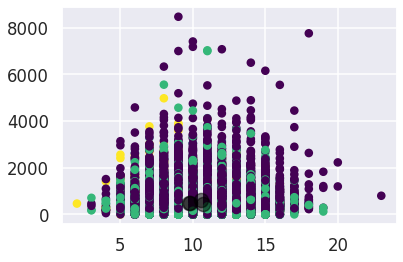

In [6]:
#K-Means algorithm can be called by KMeans function. We pass the number of clusters as an argument
kmeans = KMeans(n_clusters=4)
#let us fit the kmeans model by kmeans.fit function
kmeans_output = kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


The above clustering is definitely not good as we can clearly see that the clusters are not separated from each other.

We will try a smaller dataset now.

### Smaller dataset

The smaller dataset is created by taking the first 2 columns of X: n_tokens_title and n_tokens_content.	

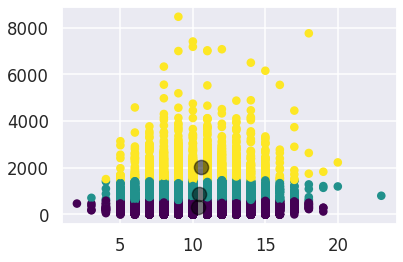

In [7]:
X1 = X.iloc[:, 0:2]
kmeans = KMeans(n_clusters=3)
kmeans_output = kmeans.fit(X1)
y_kmeans = kmeans.predict(X1)
plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Here we can see that the clusters are clearly separated. The output of the kmeans algorithm is really good here. The articles in a single cluster would have similar potential of being viral.


## Task 2: Select the first ten columns of X and store the result in variable X2

In [8]:
X2 = X.iloc[:, 0:10]
X2.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length
0,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365
1,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725
2,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365
3,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896
4,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836


In [9]:
# Let's experiment a bit by increasing the number of clusters and number of columns as well.

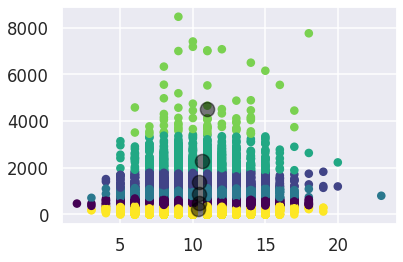

In [10]:
#Now, let us apply K-Means algorithm on X2 with 6 clusters
kmeans = KMeans(n_clusters=6)
kmeans_output = kmeans.fit(X2)
y_kmeans = kmeans.predict(X2)
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [11]:
#Let us take a subset of dataset X, called X3
X3 = X.iloc[:, 5:13]
cols = len(X3.axes[1])
print(cols)

8


## Task 3: Apply K-Means on dataset X3 with 10 clusters and visualise the data

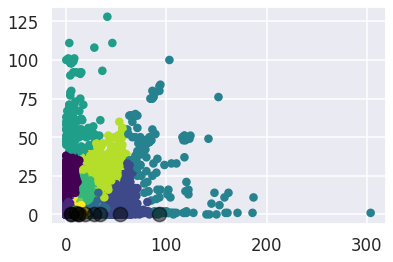

In [12]:
#Now, let us apply K-Means algorithm on X2 with 6 clusters
kmeans = KMeans(n_clusters=10)
kmeans_output = kmeans.fit(X3)
y_kmeans = kmeans.predict(X3)
plt.scatter(X3.iloc[:, 0], X2.iloc[:, 7], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 7], c='black', s=200, alpha=0.5);

#### Let us take all the relevant features and build an end to end classification model that will predict popularity based on all the other features. For this classification, let us compare various popular supervised classification techniques.

Separating independent variables and dependent variables. Since here we are predicting the popularity, the 'popular' feature will be the dependent variable.

In [13]:
independent_var = X_final.drop('Popular', axis =1).values
# Target
dependent_var= X_final.Popular.values

Splitting the data into two sets, one for training and the other for testing. 20% random samples from the dataset is splitted to form a test set. X_train and X_test contains all the independent features used for training and testing respectively. y_train and y_test contains the dependent feature for training and testing respectively.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independent_var,dependent_var, test_size=0.2, random_state=42)

Scaling the independent features for both train and test set.

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Supervised model 1: Logistic regression

In [17]:
from sklearn.linear_model import LogisticRegression
lin_reg = LogisticRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

/home/codespace/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Compute Confusion matrix and accuracy are from the predicted value and the y_test.

In [ ]:
#yourcodehere

Comparing predicted values and actual values of 5 samples

In [ ]:
print(y_pred[0:5])

In [ ]:
print(y_test[0:5])

## Supervised model 2: Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)
from sklearn import metrics
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred_svc))

Let us now compare some of the actual values and predicted values of the support vector classifier.

In [ ]:
print(y_pred_svc[0:5])

In [ ]:
print(y_test[0:5])

## Supervised model 3: KNN classifier
Disclaimer: The following lines of code for KNN classifier may take some time to execute. You can skip this model and straightaway go to the line where you are giving input feature array.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
accuracy_rate=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10)
    accuracy_rate.append(score.mean())

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),accuracy_rate,color='blue',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

As evident from the plot, since the accuracy is remaining constant after 30 neighbours, we are chosing 30 as the number of neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)

Compute Confusion matrix and accuracy are from the predicted value and the y_test.

In [ ]:
#yourcodehere

In [ ]:
print(knn_pred[0:5])

In [ ]:
print(y_test[0:5])

#### Let us now give our own input. Feel free to change any inputs to observe the difference in prediction¶

In [ ]:
input_feature=[13,1072,0.415645617,0.999999999,0.540889526,19,19,20,0,4.682835821,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,545,16000,3151.157895,1,0,0,0,0,0,0,0,0.02863281,0.028793552,0.028575185,0.028571675,0.885426778,0.513502123,0.281003476,0.074626866,0.012126866,0.860215054,0.139784946,0.411127435,0.033333333,1,-0.220192308,-0.5,-0.05,0.454545455,0.136363636,0.045454545,0.136363636,505]
input_feature_2=[19,211,0.575129531,0.999999992,0.663865541,3,1,1,0,4.393364929,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,918,918,918,1,0,0,0,0,0,0,0,0.217792289,0.033334457,0.033351425,0.033333536,0.682188294,0.702222222,0.323333333,0.056872038,0.009478673,0.857142857,0.142857143,0.495833333,0.1,1,-0.466666667,-0.8,-0.133333333,0,0,0.5,0,10000]

In [ ]:
X_input=np.array(input_feature)
X_input=X_input.reshape(1, -1)
X_input = scaler.transform(X_input)
predicted_popularity=lin_reg.predict(X_input)

In [ ]:
print(predicted_popularity)

In [ ]:
X_input_2=np.array(input_feature_2)
X_input_2=X_input_2.reshape(1, -1)
X_input_2 = scaler.transform(X_input_2)
predicted_popularity_2=lin_reg.predict(X_input_2)
print(predicted_popularity_2)